In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import signal
import numpy as np
import os
import pickle

plt.rcParams["figure.figsize"] = (16, 9)

In [2]:
N = 1000
dt = np.zeros(N)
np.random.seed(0)

for t in range(N):
    dt[t] += 50 * np.random.randn()
    
    a1 = 429 * np.exp(-((t - N / 2) / (N / 10)) ** 2)
    p1 = 25
    s1 = p1 / 5
    dt[t] += a1 * np.sin(2 * np.pi * t / p1 + s1)
    
    a2 = 212 * (np.tanh(5 * (2 * t / N - 1)) + 1)
    p2 = 50
    s2 = p2 / 7
    dt[t] += a2 * np.sin(2 * np.pi * t / p2 + s2 + np.random.randn() / 2)
    
    a3 = 375
    p3 = 100
    s3 = p3 / 4
    dt[t] += a3 * np.sin(2 * np.pi * t / p3 + s3 + np.random.randn() / 10)

pickle.dump(dt, open('fft_data.p', 'wb'))

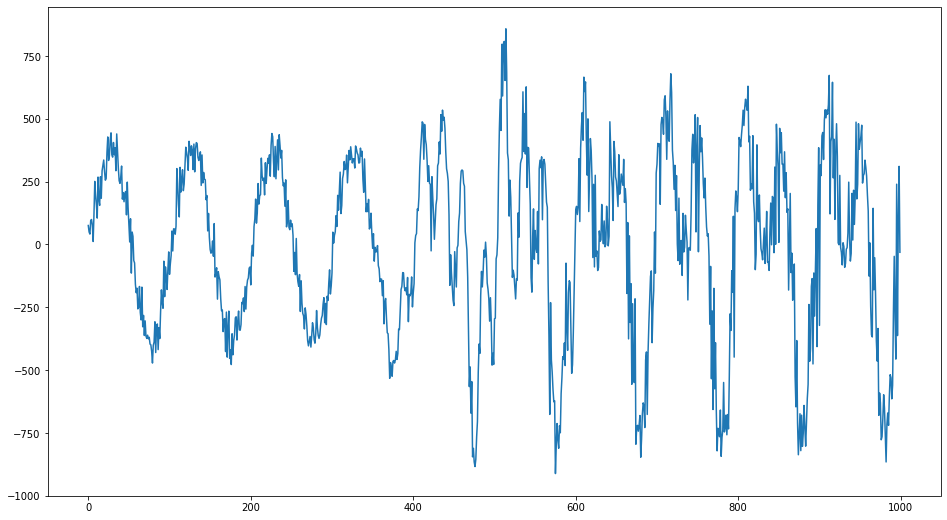

In [3]:
if os.path.isfile('fft_data.p'):
    dt = pickle.load(open('fft_data.p', 'rb'))
plt.plot(dt);

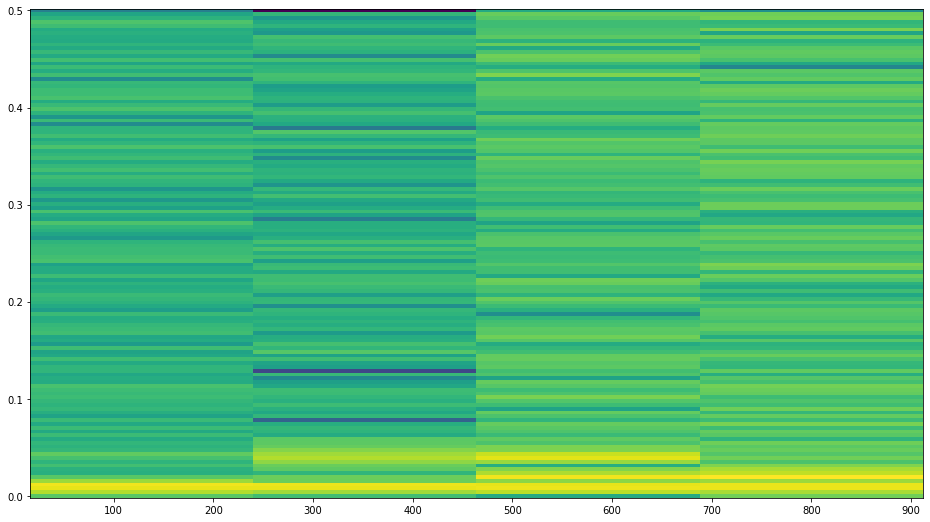

In [4]:
f, t, Sxx = signal.spectrogram(dt, 1)
plt.pcolormesh(t, f, np.log10(Sxx), shading='auto');

<ipython-input-5-98a33d9d117f>:5: RuntimeWarning: divide by zero encountered in true_divide
  per = np.rint(1 / fshort).astype(int)


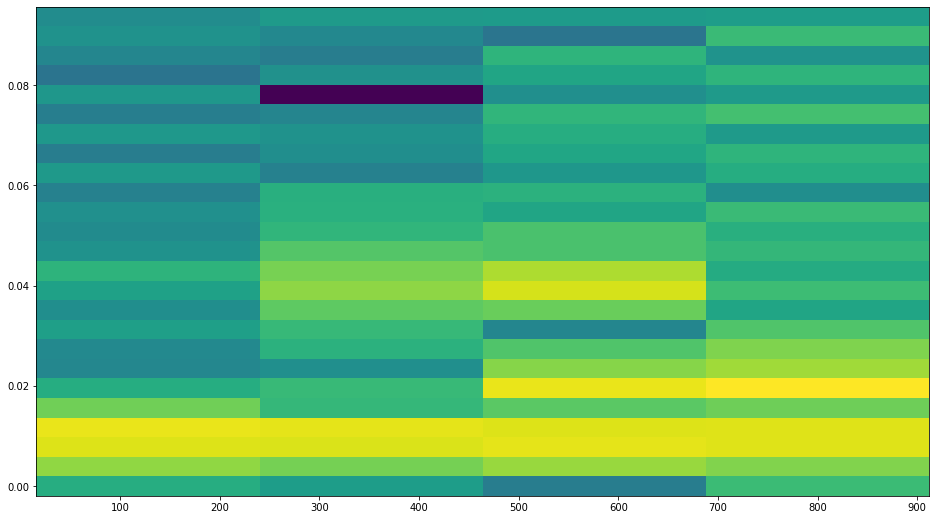

In [5]:
f, t, Sxx = signal.spectrogram(dt, 1)
frac = len(f) // 5
fshort = f[0:frac]
Sshort = Sxx[0:frac]
per = np.rint(1 / fshort).astype(int)
plt.pcolormesh(t, fshort, np.log10(Sshort), shading='auto');

<ipython-input-6-8d4d34f9a61f>:6: RuntimeWarning: divide by zero encountered in true_divide
  per = np.rint(1 / fshort).astype(int)


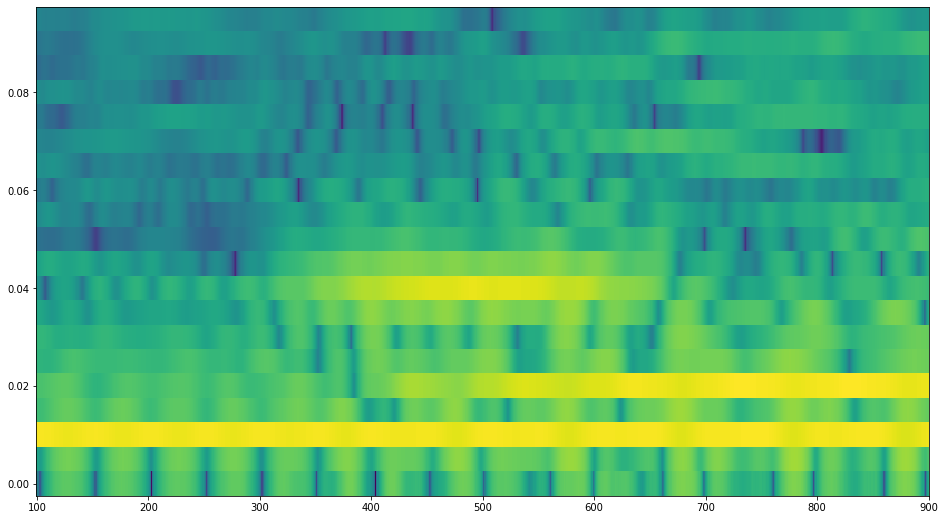

In [6]:
nseg = 200
f, t, Sxx = signal.spectrogram(dt, 1, nperseg=nseg, noverlap=nseg-1)
frac = len(f) // 5
fshort = f[0:frac]
Sshort = Sxx[0:frac]
per = np.rint(1 / fshort).astype(int)
plt.pcolormesh(t, fshort, np.log10(Sshort), shading='auto');

<ipython-input-7-d185477cd15c>:6: RuntimeWarning: divide by zero encountered in true_divide
  per = np.rint(1 / fshort).astype(int)


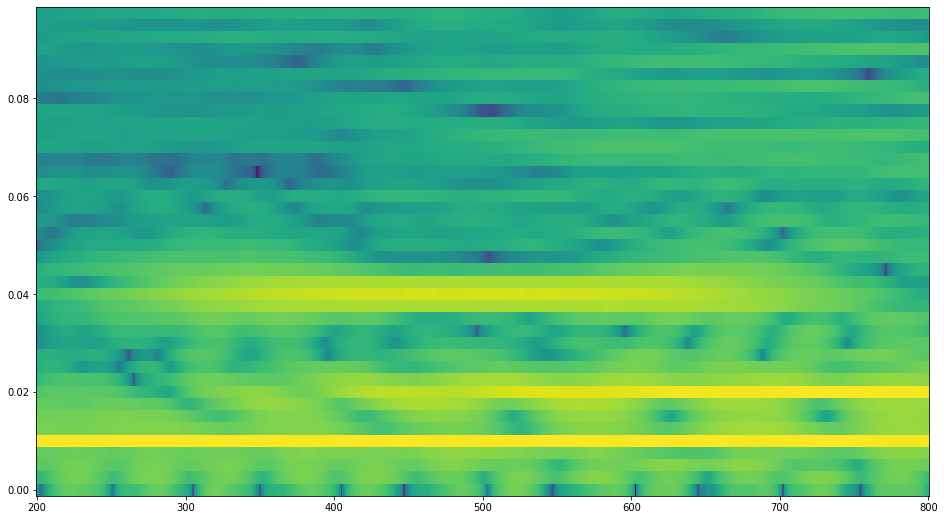

In [7]:
nseg = 400
f, t, Sxx = signal.spectrogram(dt, 1, nperseg=nseg, noverlap=nseg-1)
frac = len(f) // 5
fshort = f[0:frac]
Sshort = Sxx[0:frac]
per = np.rint(1 / fshort).astype(int)
plt.pcolormesh(t, fshort, np.log10(Sshort), shading='auto');

<ipython-input-8-61c7f2bb9bde>:6: RuntimeWarning: divide by zero encountered in true_divide
  per = np.rint(1 / fshort).astype(int)


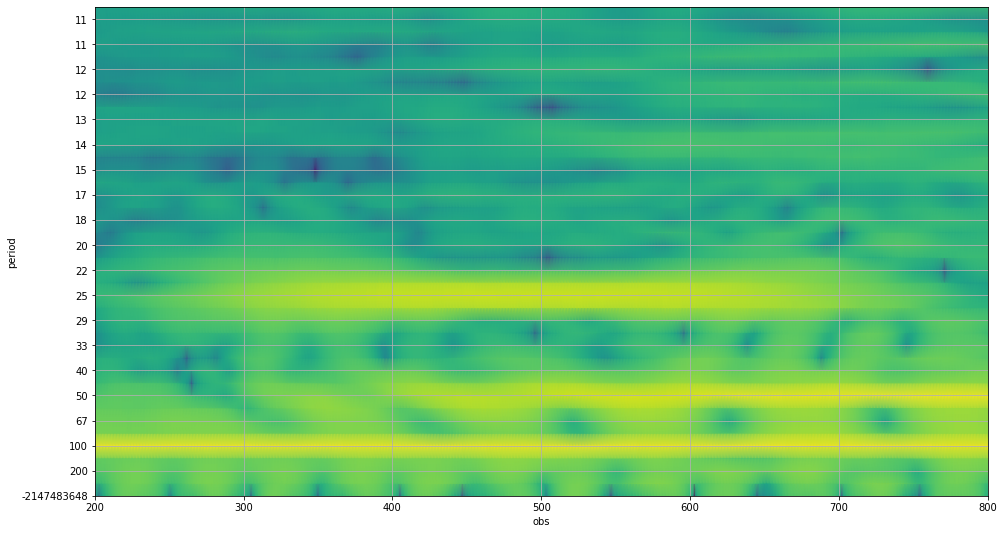

In [8]:
nseg = 400
f, t, Sxx = signal.spectrogram(dt, 1, nperseg=nseg, noverlap=nseg-1)
frac = len(f) // 5
fshort = f[0:frac]
Sshort = Sxx[0:frac]
per = np.rint(1 / fshort).astype(int)

plt.yticks(ticks=fshort[::2], labels=per[::2])
plt.ylabel('period')
plt.xlabel('obs')
plt.pcolormesh(t, fshort, np.log10(Sshort), shading='gouraud')
plt.grid(True)
plt.show()